# Advanced Regression Assignment
---

## Goal of the assignment
We need to analyse the data containing house prices using Linear/Polynomial Regression methodology to understand what features/variables affect the house prices. We need to build a regression model with regularisation techniques in order to predict the actual value of the prospective properties so that our customer can use the model to decide whether to invest in houses/properties or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house
1. How well those variables describe the price of a house.

In [138]:
# Import the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [139]:
# Set display options for Pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [140]:
# Read the data
house_df = pd.read_csv("train.csv")

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Analysis

In [141]:
# Data description
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [142]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [143]:
# Check the no. of columns and rows
house_df.shape

(1460, 81)

In [144]:
# Check for missing values within columns
house_df.isnull().sum()[house_df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There are some interesting scatter plots where we find that the data shows a linear cum spread plot on the same chart.

## Data Preparation

In [145]:
# There are multiple categorical variables in the data set we will create corresponding dummy variables/features for those 
# categories to be interpreted by the model 
# Create dummy variables for all the categorical variables
MSSubClass_df = pd.get_dummies(house_df["MSSubClass"], prefix="MSSubClass", dtype='int')
MSZoning_df = pd.get_dummies(house_df["MSZoning"], prefix="MSZoning", dtype='int')
Street_df = pd.get_dummies(house_df["Street"], prefix="Street", dtype='int')
Alley_df = pd.get_dummies(house_df["Alley"], prefix="Street", dtype='int')
LotShape_df = pd.get_dummies(house_df["LotShape"], prefix="LotShape", dtype='int')
LandContour_df = pd.get_dummies(house_df["LandContour"], prefix="LandContour", dtype='int')
Utilities_df = pd.get_dummies(house_df["Utilities"], prefix="Utilities", dtype='int')
LotConfig_df = pd.get_dummies(house_df["LotConfig"], prefix="LotConfig", dtype='int')
LandSlope_df = pd.get_dummies(house_df["LandSlope"], prefix="LandSlope", dtype='int')
Neighborhood_df = pd.get_dummies(house_df["Neighborhood"], prefix="Neighborhood", dtype='int')
Condition1_df = pd.get_dummies(house_df["Condition1"], prefix="Condition1", dtype='int')
Condition2_df = pd.get_dummies(house_df["Condition2"], prefix="Condition2", dtype='int')
BldgType_df = pd.get_dummies(house_df["BldgType"], prefix="BldgType", dtype='int')
HouseStyle_df = pd.get_dummies(house_df["HouseStyle"], prefix="HouseStyle", dtype='int')
RoofStyle_df = pd.get_dummies(house_df["RoofStyle"], prefix="RoofStyle", dtype='int')
RoofMatl_df = pd.get_dummies(house_df["RoofMatl"], prefix="RoofMatl", dtype='int')
Exterior1st_df = pd.get_dummies(house_df["Exterior1st"], prefix="Exterior1st", dtype='int')
Exterior2nd_df = pd.get_dummies(house_df["Exterior2nd"], prefix="Exterior2nd", dtype='int')
MasVnrType_df = pd.get_dummies(house_df["MasVnrType"], prefix="MasVnrType", dtype='int')
ExterQual_df = pd.get_dummies(house_df["ExterQual"], prefix="ExterQual", dtype='int')
ExterCond_df = pd.get_dummies(house_df["ExterCond"], prefix="ExterCond", dtype='int')
Foundation_df = pd.get_dummies(house_df["Foundation"], prefix="Foundation", dtype='int')
BsmtQual_df = pd.get_dummies(house_df["BsmtQual"], prefix="BsmtQual", dtype='int')
BsmtCond_df = pd.get_dummies(house_df["BsmtCond"], prefix="BsmtCond", dtype='int')
BsmtExposure_df = pd.get_dummies(house_df["BsmtExposure"], prefix="BsmtExposure", dtype='int')
BsmtFinType1_df = pd.get_dummies(house_df["BsmtFinType1"], prefix="BsmtFinType1", dtype='int')
BsmtFinType2_df = pd.get_dummies(house_df["BsmtFinType2"], prefix="BsmtFinType2", dtype='int')
Heating_df = pd.get_dummies(house_df["Heating"], prefix="Heating", dtype='int')
HeatingQC_df = pd.get_dummies(house_df["HeatingQC"], prefix="HeatingQC", dtype='int')
CentralAir_df = pd.get_dummies(house_df["CentralAir"], prefix="CentralAir", dtype='int')
Electrical_df = pd.get_dummies(house_df["Electrical"], prefix="Electrical", dtype='int')
KitchenQual_df = pd.get_dummies(house_df["KitchenQual"], prefix="KitchenQual", dtype='int')
Functional_df = pd.get_dummies(house_df["Functional"], prefix="Functional", dtype='int')
FireplaceQu_df = pd.get_dummies(house_df["FireplaceQu"], prefix="FireplaceQu", dtype='int')
GarageType_df = pd.get_dummies(house_df["GarageType"], prefix="GarageType", dtype='int')
GarageFinish_df = pd.get_dummies(house_df["GarageFinish"], prefix="GarageFinish", dtype='int')
GarageQual_df = pd.get_dummies(house_df["GarageQual"], prefix="GarageQual", dtype='int')
GarageCond_df = pd.get_dummies(house_df["GarageCond"], prefix="GarageCond", dtype='int')
PavedDrive_df = pd.get_dummies(house_df["PavedDrive"], prefix="PavedDrive", dtype='int')
PoolQC_df = pd.get_dummies(house_df["PoolQC"], prefix="PoolQC", dtype='int')
Fence_df = pd.get_dummies(house_df["Fence"], prefix="Fence", dtype='int')
MiscFeature_df = pd.get_dummies(house_df["MiscFeature"], prefix="MiscFeature", dtype='int')
SaleType_df = pd.get_dummies(house_df["SaleType"], prefix="SaleType", dtype='int')
SaleCondition_df = pd.get_dummies(house_df["SaleCondition"], prefix="SaleCondition", dtype='int')

In [146]:
Neighborhood_df.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [147]:
# Concatenate the dummy dataframes with the housing df
house_df = pd.concat([
    house_df,
    MSSubClass_df, 
    MSZoning_df, 
    Street_df,
    Alley_df,
    LotShape_df,
    LandContour_df,
    Utilities_df,
    LotConfig_df,
    LandSlope_df,
    Neighborhood_df,
    Condition1_df,
    Condition2_df,
    BldgType_df,
    HouseStyle_df,
    RoofStyle_df,
    RoofMatl_df,
    Exterior1st_df,
    Exterior2nd_df,
    MasVnrType_df,
    ExterQual_df,
    ExterCond_df,
    Foundation_df,
    BsmtQual_df,
    BsmtCond_df,
    BsmtExposure_df,
    BsmtFinType1_df,
    BsmtFinType2_df,
    Heating_df,
    HeatingQC_df,
    CentralAir_df,
    Electrical_df,
    KitchenQual_df,
    Functional_df,
    FireplaceQu_df,
    GarageType_df,
    GarageFinish_df,
    GarageQual_df,
    GarageCond_df,
    PavedDrive_df,
    PoolQC_df,
    Fence_df,
    MiscFeature_df,
    SaleType_df,
    SaleCondition_df
], axis=1)

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heati

In [148]:
# Now we will drop the categorical columns for which we made the dummmy columns
house_model_df = house_df.drop([
    "MSSubClass", 
    "MSZoning", 
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition"
], axis=1)

house_model_df.head() 

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,Gara

In [149]:
# Replace all NaN into zeroes
house_model_df.fillna(0, inplace=True)

### `Data preparation` <span style="color:green">*complete*</span> 
All NaN values have been replaced with zeros.
All the categorical data has been converted into indicator variables. 
Our data is now ready to be modelled. 

## Linear Regression Model

In [150]:
# Create the train and test dataframes
train_df, test_df = train_test_split(house_model_df, train_size=0.7, random_state=100)

print(train_df.shape)
print(test_df.shape)

(1021, 303)
(439, 303)


In [151]:
# Rescale the training data 
scaler = MinMaxScaler()

# The scaled values are now stored in a Numpy array
train_scaled = scaler.fit_transform(train_df)

# Convert the Numpy array into a Pandas dataframe
column_names = list(train_df.columns)

train_scaled_df = pd.DataFrame(train_scaled, columns=column_names)

In [152]:
train_scaled_df.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,Gara

In [153]:
# Split the dataset into x and y
y = train_scaled_df.pop("SalePrice") # Pull the SalePrice column into a new dataframe as the predicted value
X = train_scaled_df # The rest of the columns are the features

The dataset has `303 features`. We will use RFE to bring down the number of features.
That will make the model more focused, manageable and less resource hungry

## RFE (Recursive Feature Elimination)

In [154]:
# RFE to identify the top 40 features
lm = LinearRegression()
lm.fit(X, y)

# The number of features have been finalized after a lot of trial and error
# We had selected a number of features and built the model and checked the RSS value each time until we got a good RSS value 
rfe = RFE(estimator=lm, n_features_to_select=250) 
rfe = rfe.fit(X, y)

In [155]:
# List all the columns and their RFE status
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Id', False, 47),
 ('LotFrontage', False, 27),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearBuilt', False, 2),
 ('YearRemodAdd', False, 20),
 ('MasVnrArea', False, 12),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 31),
 ('BsmtHalfBath', False, 46),
 ('FullBath', False, 43),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', False, 13),
 ('KitchenAbvGr', False, 4),
 ('TotRmsAbvGrd', False, 34),
 ('Fireplaces', False, 40),
 ('GarageYrBlt', False, 14),
 ('GarageCars', False, 16),
 ('GarageArea', False, 5),
 ('WoodDeckSF', False, 24),
 ('OpenPorchSF', False, 25),
 ('EnclosedPorch', False, 28),
 ('3SsnPorch', False, 19),
 ('ScreenPorch', False, 30),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 37),
 ('YrSold', False, 38),
 ('MSSubClass_20', True, 1),
 ('

In [156]:
# The selected columns from RFE
col = X.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=250)

In [157]:
# The ignored columns from RFE
X.columns[~rfe.support_]

Index(['Id', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'Street_Grvl', 'Street_Pave', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Electrical_Mix', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC'], dtype='object')

In [158]:
# Picking up the columns selected from RFE into a new df
X_train_rfe = X[col]

## Linear Regression Model

In [159]:
# Building the regression model
reg = LinearRegression()
reg.fit(X_train_rfe,y)
#reg.fit(X,y)

LinearRegression()

In [160]:
# Get the prediction values of y based on the model
y_pred = reg.predict(X_train_rfe)
#y_pred = reg.predict(X)

In [161]:
# Calculate the value of r squared
r2 = r2_score(y , y_pred)
print("R squared score is %2.4f" % (r2))

R squared score is 0.9408


The R squared score is quite high, i.e. over 0.94. So the model can explain more than `94%` of the data.

In [162]:
# Get the coefficients of the linear equation
beta0 = reg.intercept_
beta1 = reg.coef_

print("Intercept / Beta 0 of the equation is %2.4f" % (beta0))
print("Coefficients / Beta 1 of all the variables are below \n", beta1)

Intercept / Beta 0 of the equation is 49990902151.2140
Coefficients / Beta 1 of all the variables are below 
 [ 2.37152650e-01  1.16041474e-01 -6.81643124e+09 -1.78019484e+09
 -2.82125857e+09  7.37923368e+09 -2.88677763e+10 -1.37990644e+10
 -3.44141315e+09  3.47749787e+10  5.62539364e+00  1.70883902e-01
 -1.06614085e+09 -1.06614085e+09 -1.06614085e+09 -1.06614085e+09
 -1.06614085e+09 -1.06614085e+09 -1.06614085e+09 -1.06614085e+09
 -1.06614085e+09 -1.06614085e+09 -1.02339557e+10 -1.06614085e+09
 -1.06614085e+09 -1.06614085e+09 -4.50209054e+09  5.68434028e+09
  5.68434028e+09  5.68434028e+09  5.68434028e+09  5.68434028e+09
 -1.05967838e+10 -3.21054459e-03 -1.05967838e+10 -4.35245037e-03
  2.08736357e+09  2.08736357e+09  2.08736357e+09  2.08736357e+09
  1.37759285e+10  1.37759285e+10  1.37759285e+10  1.37759285e+10
 -2.55957910e+08 -2.55957910e+08 -9.50748545e+09 -9.50748545e+09
 -9.50748545e+09 -9.50748545e+09 -9.50748545e+09  3.43656470e+09
  3.43656470e+09  3.43656470e+09 -1.48397775e

In [163]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred))
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5


print("The residual sum of square value is %2.4f" % (rss))
print("The mean square error value is %2.4f" % (mse))
print("The root mean square error value is %2.4f" % (rmse))


The residual sum of square value is 0.7287
The mean square error value is 0.0007
The root mean square error value is 0.0267


### The RMSE and MSE values are quite close to `0`

In [164]:
# Residual analysis
# We will find out the differences between the actual values of y versus the predicted value of y from the moel
y_residual = y - y_pred

We find that the residuals are scattered evenly on either side of the 0 line. 

Text(0, 0.5, 'y_pred')

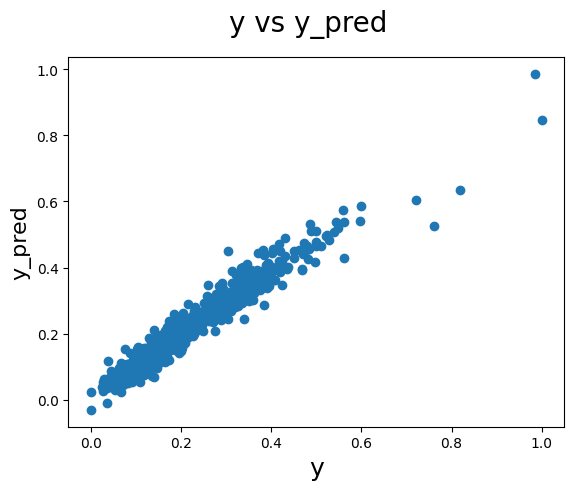

In [166]:
# Plotting y and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y,y_pred)
fig.suptitle('y vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We get linear trend and the model looks stable

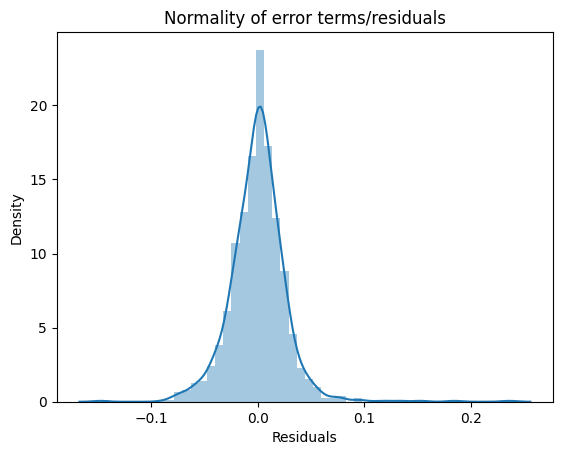

In [168]:
# Distribution of errors
p = sns.distplot(y_residual,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

The plot shows a normal distribution curve. The model therefore seems to be dependable. 

## Ridge Regression

In [169]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [170]:
# Printing the best hyperparameter alpha
print("The best value of Alpha for Ridge regression is ", model_cv.best_params_)

The best value of Alpha for Ridge regression is  {'alpha': 0.4}


In [171]:
# Identify the coefficients from Ridge regression using the best Alpha
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y)
print(ridge.coef_)

[ 1.22370063e-01  1.16538145e-01  1.31193304e-01  2.58043568e-02
  9.39887853e-03  1.31005959e-01  1.68269176e-01  1.23774544e-01
 -2.21951975e-02  1.86603910e-01 -3.58962378e-02  2.56804400e-02
  6.81159282e-03  4.37607578e-03  9.86362208e-03 -7.56534991e-03
  5.80309382e-03  1.41678288e-02  2.64952711e-03 -2.37530872e-02
 -4.71470205e-03 -1.66051091e-03 -3.95651989e-03 -8.71952817e-03
  6.40041171e-03  4.73958196e-03 -4.44203602e-03 -3.38817514e-02
  3.88432946e-03  1.00967308e-02  1.13212563e-02  8.57943482e-03
 -7.39644519e-03  2.58893932e-03  7.39644519e-03 -2.28516648e-03
  1.31057832e-03  1.13169191e-03 -2.90752919e-03  4.65258964e-04
 -1.70720772e-02  1.03133949e-02  2.28877475e-03  4.46990751e-03
  1.57619468e-02 -1.57619468e-02  9.73097400e-04  1.44376934e-02
 -1.26999451e-02 -1.79298343e-03 -9.17862345e-04 -5.86612831e-03
  9.45327936e-03 -3.58715105e-03 -3.54671500e-03  6.64065209e-03
 -1.13264025e-02 -2.52192095e-03 -8.03407799e-03 -8.61072456e-03
  2.86131159e-02 -2.66821

In [172]:
# Get the predictions from the model
y_pred = ridge.predict(X_train_rfe)

Text(0, 0.5, 'y_pred')

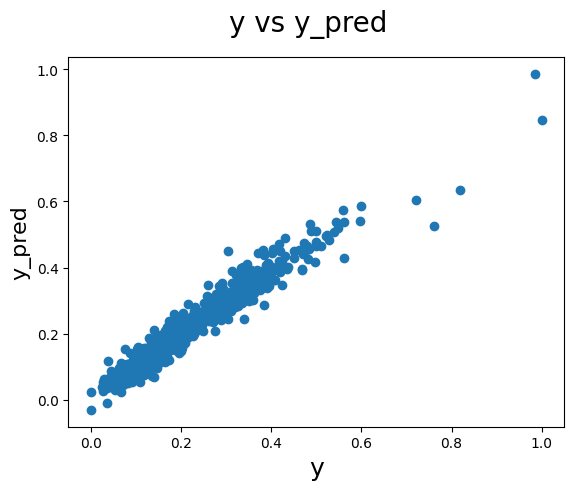

In [137]:
# Plotting y and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [100]:
# Metrics to give an overall sense of error in the model
# Calculate the value of r squared
r2 = r2_score(y , y_pred)
print("R squared score is %2.4f" % (r2))

rss = np.sum(np.square(y - y_pred))
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5


print("The residual sum of square value is %2.4f" % (rss))
print("The mean square error value is %2.4f" % (mse))
print("The residual mean square error value is %2.4f" % (rmse))

R squared score is 0.9301
The residual sum of square value is 0.8609
The mean square error value is 0.0008
The residual mean square error value is 0.0290


The R squared score is `0.93`. This is a good value indicating that `93%` of the data can be explained by this model.

## Lasso Regression

In [101]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print("The best value of Alpha for Lasso regression is ", model_cv.best_params_)

The best value of Alpha for Lasso regression is  {'alpha': 0.0001}


In [103]:
# Identify the selected and rejected coefficients using the best Alpha for the model 
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y) 

lasso.coef_

array([ 8.51401794e-02,  1.24798203e-01,  1.10320447e-01,  1.47347293e-02,
       -0.00000000e+00,  9.52378935e-02,  0.00000000e+00,  0.00000000e+00,
       -4.10207582e-02,  4.26118873e-01,  0.00000000e+00,  0.00000000e+00,
        3.02800338e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.16838982e-03, -3.94737918e-05, -1.15025373e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.32531680e-04,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.10504875e-02,
        0.00000000e+00,  0.00000000e+00,  4.93563174e-03, -2.84675911e-04,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.74733646e-04,  0.00000000e+00, -0.00000000e+00, -8.50028233e-04,
       -1.74773528e-02,  2.57921172e-03,  5.19140078e-04, -8.27097256e-06,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.30097255e-02,
       -1.03955358e-02,  0.00000000e+00, -5.15550239e-04, -1.26528997e-02,
        0.00000000e+00,  

In [44]:
# Get the predictions from the model
y_pred = lasso.predict(X_train_rfe)

In [ ]:
# Plot the residual values against the predicted value to check the spread and to see if there is a trend
# X_train_rfe['residual'] = y_residual
# plt.scatter( y_pred , X_train_rfe['residual'])
plt.scatter( y_pred , y_residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Text(0, 0.5, 'y_pred')

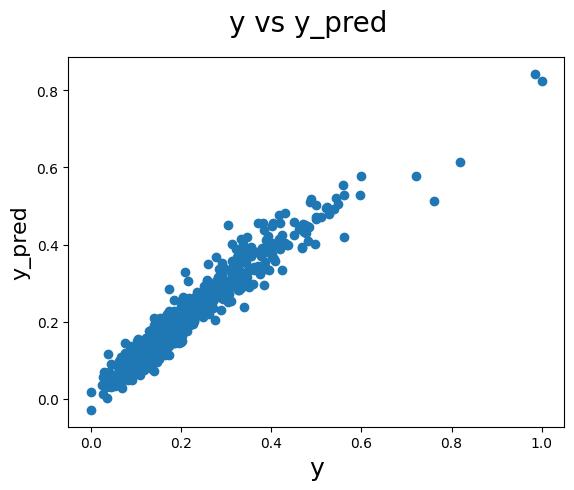

In [104]:
# Plotting y and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y,y_pred)
fig.suptitle('y vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

This plot looks very linear and so the model looks dependable

In [45]:
# Metrics to give an overall sense of error in the model
# Calculate the value of r squared
r2 = r2_score(y , y_pred)
print("R squared score is %2.4f" % (r2))

rss = np.sum(np.square(y - y_pred))
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5


print("The residual sum of square value is %2.4f" % (rss))
print("The mean square error value is %2.4f" % (mse))
print("The residual mean square error value is %2.4f" % (rmse))

R squared score is 0.9213
The residual sum of square value is 0.9684
The mean square error value is 0.0009
The residual mean square error value is 0.0308


The R squared score is `0.92`. It has reduced by `0.01%` compared to the Ridge regression as a number of features have been eliminated to keep the model simpler. 

### Compare coefficients across models

In [46]:
# We will create dataframe with rows same as the training dataset columns to store the coefficients
coef_df = pd.DataFrame(index=X_train_rfe.columns)
coef_df.rows = X_train_rfe.columns


In [47]:
# Store the coefficients 
coef_df['Linear'] = reg.coef_
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_

In [48]:
pd.set_option('display.max_rows', None)
coef_df.head(70)

,Linear,Ridge,Lasso
LotArea,2.371526e-01,0.122370,0.085140
OverallQual,1.160415e-01,0.116538,0.124798
BsmtFinSF1,-6.816431e+09,0.131193,0.110320
BsmtFinSF2,-1.780195e+09,0.025804,0.014735
BsmtUnfSF,-2.821259e+09,0.009399,-0.000000
TotalBsmtSF,7.379234e+09,0.131006,0.095238
1stFlrSF,-2.886778e+10,0.168269,0.000000
2ndFlrSF,-1.379906e+10,0.123775,0.000000
LowQualFinSF,-3.441413e+09,-0.022195,-0.041021
GrLivArea,3.477498e+10,0.186604,0.426119


In [49]:
# Identifying non-zero coefficients (i.e., selected variables)
selected_features = np.where(lasso.coef_ != 0)[0]

print(f"Selected variables: {selected_features}")

Selected variables: [  0   1   2   3   5   8   9  12  17  18  19  23  27  30  31  36  39  40
  41  42  43  47  48  50  51  57  58  60  61  65  66  68  69  70  71  73
  75  76  78  79  81  82  84  85  92  96  99 101 103 106 107 112 115 122
 126 129 135 137 143 145 151 153 154 157 163 164 169 171 172 173 177 179
 180 181 182 189 191 194 195 196 199 200 202 203 206 207 210 212 217 219
 221 222 229 233 235 237 243 245 246 249 251]


<function matplotlib.pyplot.show(close=None, block=None)>

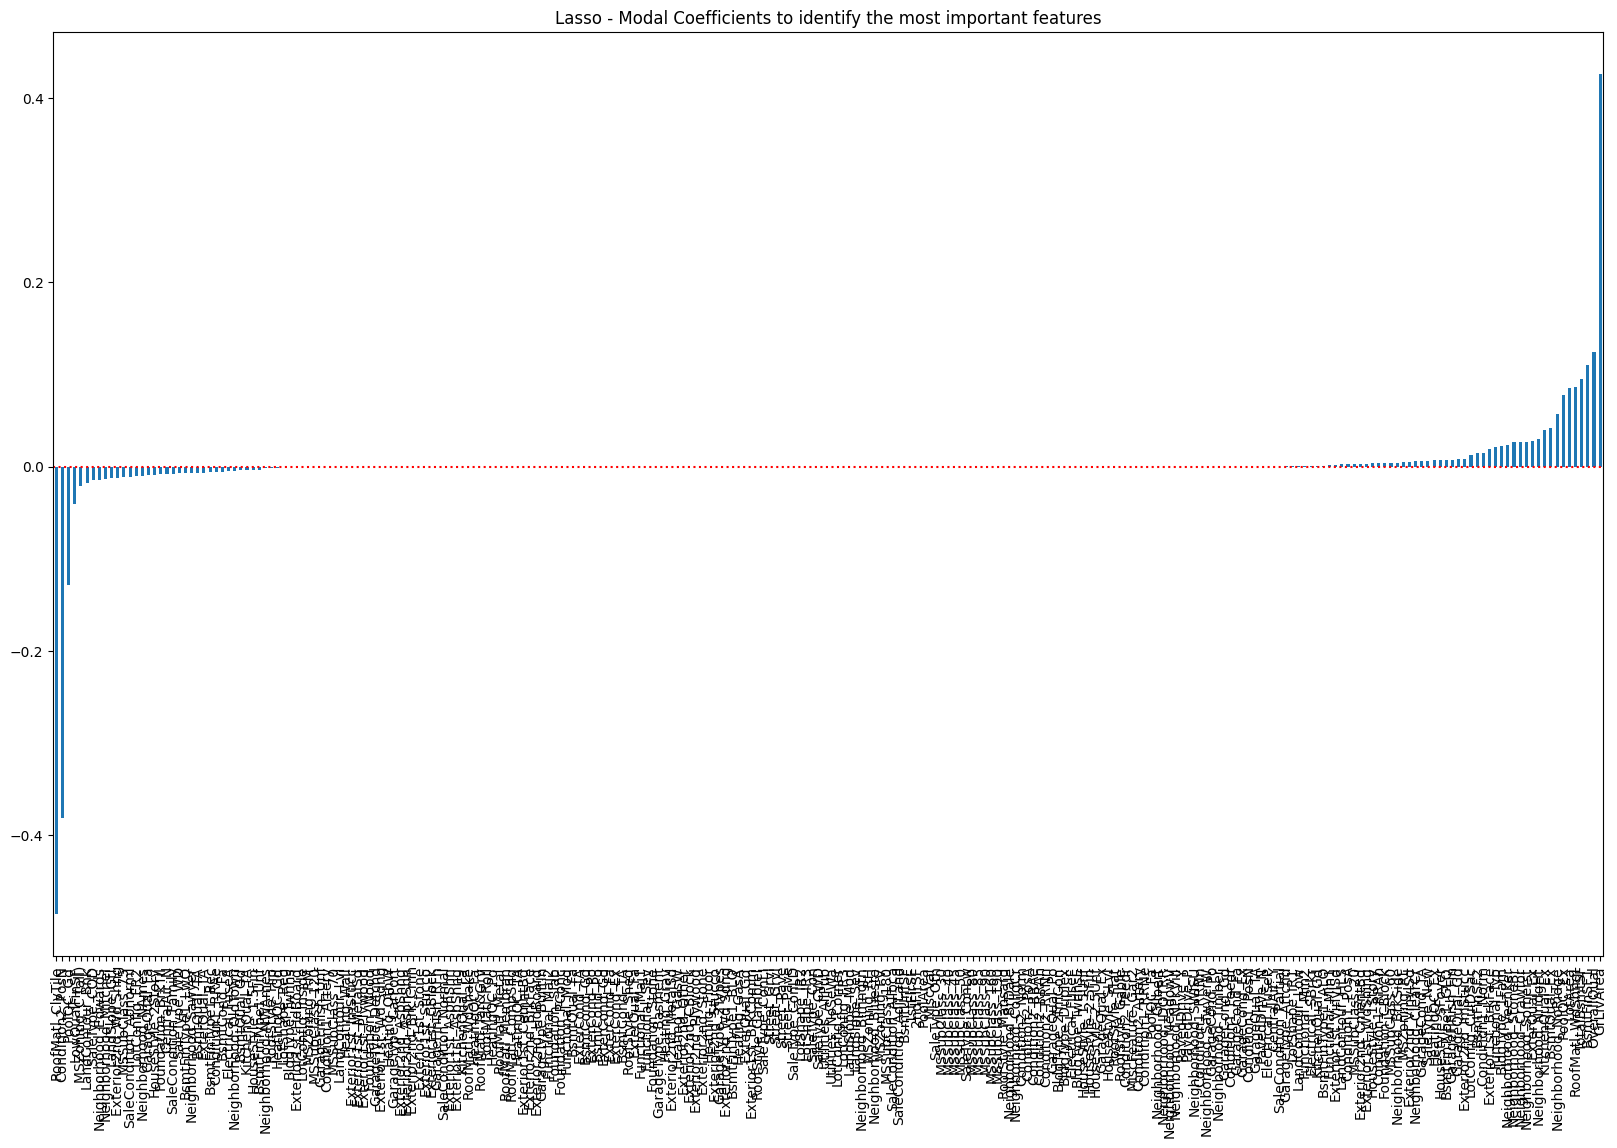

In [50]:
# Plot the coefficients with the features to identify the ones that affect the model
predictors = X_train_rfe.columns
coefficients = lasso.coef_
plt.figure(figsize=(20, 12))
coef = pd.Series(coefficients,predictors).sort_values()
plt.axhline(y=0, color='r', linestyle=':')
coef.plot(kind='bar', title='Lasso - Modal Coefficients to identify the most important features')
plt.show

In [51]:
# The total number of selected features identified by Lasso regression
coef_df.loc[coef_df["Lasso"] != 0].count()

Linear    101
Ridge     101
Lasso     101
dtype: int64

In [53]:
# List the features identified by Lasso regression
coef_df.loc[coef_df["Lasso"] != 0]

,Linear,Ridge,Lasso
LotArea,2.371526e-01,0.122370,8.514018e-02
OverallQual,1.160415e-01,0.116538,1.247982e-01
BsmtFinSF1,-6.816431e+09,0.131193,1.103204e-01
BsmtFinSF2,-1.780195e+09,0.025804,1.473473e-02
TotalBsmtSF,7.379234e+09,0.131006,9.523789e-02
LowQualFinSF,-3.441413e+09,-0.022195,-4.102076e-02
GrLivArea,3.477498e+10,0.186604,4.261189e-01
MSSubClass_20,-1.066141e+09,0.006812,3.028003e-03
MSSubClass_60,-1.066141e+09,0.014168,4.168390e-03
MSSubClass_70,-1.066141e+09,0.002650,-3.947379e-05


## This is the optimal model with its corresponding coefficients.

The model being the Lasso Regression with aforementioned `101 features`
R squared value of `0.9213`

---------

## Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [55]:
# Sort the coefficient values to find the top 5 features of Ridge regression
coef_df.sort_values(by=["Ridge"], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,3.477498e+10,0.186604,0.426119
1stFlrSF,-2.886778e+10,0.168269,0.000000
PoolQC_Ex,-4.570325e+00,0.132290,0.077667
BsmtFinSF1,-6.816431e+09,0.131193,0.110320
TotalBsmtSF,7.379234e+09,0.131006,0.095238


In [56]:
# Sort the coefficient values to find the top 5 features of Lasso regression
coef_df.sort_values(by=["Lasso"], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,3.477498e+10,0.186604,0.426119
OverallQual,1.160415e-01,0.116538,0.124798
BsmtFinSF1,-6.816431e+09,0.131193,0.110320
TotalBsmtSF,7.379234e+09,0.131006,0.095238
RoofMatl_WdShngl,1.175902e+08,0.122116,0.086279


We shall now double the alpha values of Ridge and Lasso and rerun the models.
- Alpha for Ridge will be 2 * 0.4 = 0.8
- Alpha for Lasso will be 2 * 0.0001 = 0.0002

In [57]:
# We will create dataframe with rows same as the training dataset columns to store the coefficients
coef2_df = pd.DataFrame(index=X_train_rfe.columns)
coef2_df.rows = X_train_rfe.columns

In [58]:
# Rerun Ridge with double alpha
alpha = 0.8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y)


Ridge(alpha=0.8)

In [59]:
# Rerun Lasso with double alpha
alpha = 0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe, y) 

Lasso(alpha=0.0002)

In [60]:
# Store the coefficients 
coef2_df['Linear'] = reg.coef_
coef2_df['Ridge'] = ridge2.coef_
coef2_df['Lasso'] = lasso2.coef_

In [61]:
# Sort the coefficient values to find the top 5 features of Ridge regression
coef2_df.sort_values(by=["Ridge"], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,3.477498e+10,0.173258,0.399271
1stFlrSF,-2.886778e+10,0.154095,0.012090
2ndFlrSF,-1.379906e+10,0.119105,0.000000
OverallQual,1.160415e-01,0.117006,0.138699
RoofMatl_WdShngl,1.175902e+08,0.113806,0.072590


In [62]:
# Sort the coefficient values to find the top 5 features of Lasso regression
coef2_df.sort_values(by=["Lasso"], ascending=False).head(5)

,Linear,Ridge,Lasso
GrLivArea,3.477498e+10,0.173258,0.399271
OverallQual,1.160415e-01,0.117006,0.138699
RoofMatl_WdShngl,1.175902e+08,0.113806,0.072590
Neighborhood_NoRidge,-1.483978e+09,0.055446,0.062710
BsmtFinSF1,-6.816431e+09,0.099660,0.050753


## Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [63]:
# Dropping the top 5 variables as per the original model, i.e. Alpha = 0.0001
X_train_rfe_new_df = X_train_rfe.drop(['GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'RoofMatl_WdShngl'], axis=1)

In [64]:
# Rerun Lasso with double alpha
alpha = 0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_rfe_new_df, y) 

Lasso(alpha=0.0001)

In [65]:
# We will create dataframe with rows same as the training dataset columns to store the coefficients
coef3_df = pd.DataFrame(index=X_train_rfe_new_df.columns)
coef3_df.rows = X_train_rfe_new_df.columns
coef3_df['Lasso'] = lasso3.coef_

In [66]:
# Sort the coefficient values to find the top 5 features of Lasso regression
coef3_df.sort_values(by=["Lasso"], ascending=False).head(5)

,Lasso
1stFlrSF,0.483271
2ndFlrSF,0.179185
LotArea,0.111775
PoolQC_Ex,0.090856
Neighborhood_NoRidge,0.066770


## Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

We will test the Lasso model with the test data as it is found to be the optimum one.

In [181]:
# Rerun Lasso with double alpha
alpha = 0.0001

lasso4 = Lasso(alpha=alpha)
        
lasso4.fit(X_train_rfe, y) 

Lasso(alpha=0.0001)

In [182]:
# Rescale the test data 
scaler = MinMaxScaler()

# The scaled values are now stored in a Numpy array
test_scaled = scaler.fit_transform(test_df)

# Convert the Numpy array into a Pandas dataframe
column_names = list(test_df.columns)

test_scaled_df = pd.DataFrame(test_scaled, columns=column_names)

In [183]:
# Picking up the columns selected from RFE into a new df
X_test_rfe = X[col]

In [184]:
# Get the predictions from the model
y_pred = lasso4.predict(X_test_rfe)

In [185]:
# Metrics to give an overall sense of error in the model
# Calculate the value of r squared
r2 = r2_score(y , y_pred)
print("R squared score is %2.4f" % (r2))

rss = np.sum(np.square(y - y_pred))
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5


print("The residual sum of square value is %2.4f" % (rss))
print("The mean square error value is %2.4f" % (mse))
print("The residual mean square error value is %2.4f" % (rmse))

R squared score is 0.9213
The residual sum of square value is 0.9684
The mean square error value is 0.0009
The residual mean square error value is 0.0308


We find that the R squared score on the test data using the Lasso model is `0.9213`. It is a very good score and matches with the train R square score. So we find this model to be very stable and credible.